In [3]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.train import train_pipeline
from src.evaluate import evaluate_models
from src.utils import plot_confusion_matrix


In [5]:
models, X_test, X_test_scaled, y_test = train_pipeline()


In [6]:
metrics_df, predictions = evaluate_models(
    X_test,
    X_test_scaled,
    y_test
)

metrics_df


,model,recall_churn,precision_churn,f1_churn,roc_auc
0,logistic_regression,0.641711,0.549199,0.591862,0.808533
1,decision_tree,0.794118,0.484502,0.601824,0.824295
2,random_forest,0.812834,0.490323,0.611670,0.826951


### Model Performance Comparison Plot


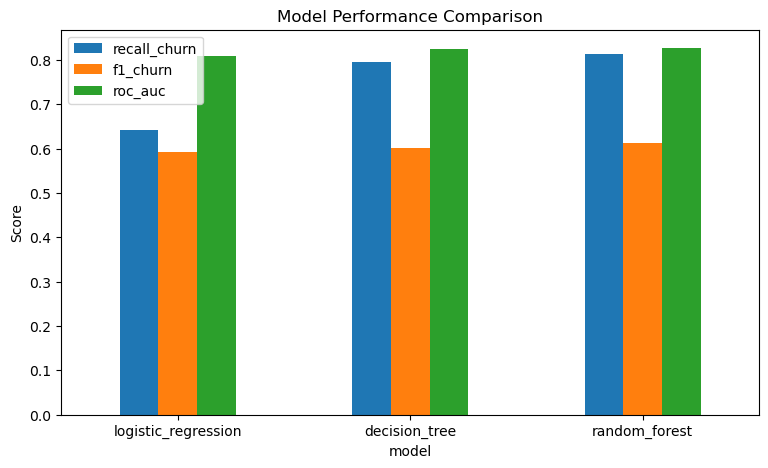

In [7]:
metrics_df.set_index("model")[["recall_churn", "f1_churn", "roc_auc"]].plot(
    kind="bar",
    figsize=(9, 5)
)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


### Confusion Matrix


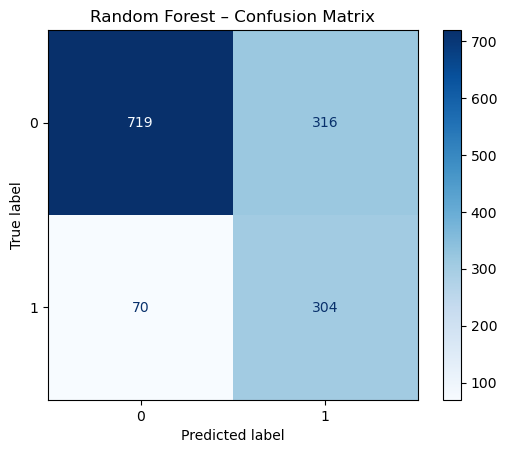

In [8]:
y_pred_rf = predictions["random_forest"]["y_pred"]

plot_confusion_matrix(
    y_test,
    y_pred_rf,
    title="Random Forest – Confusion Matrix"
)


### ROC Curve Comparison

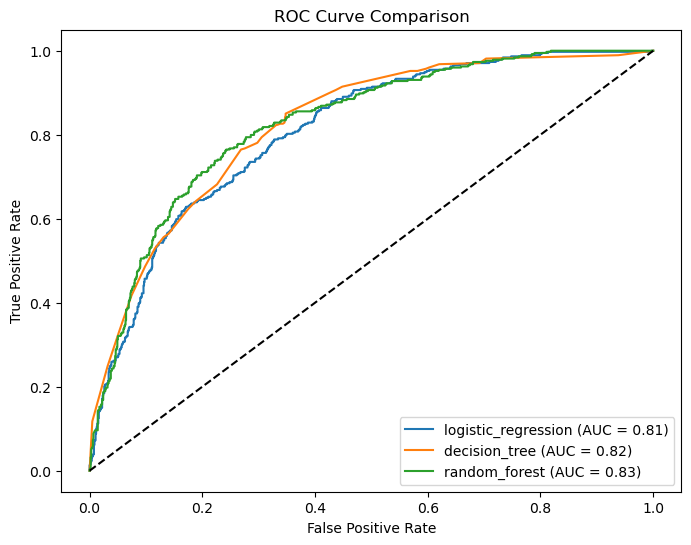

In [9]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for model_name, pred in predictions.items():
    fpr, tpr, _ = roc_curve(y_test, pred["y_prob"])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### Feature Importance (Random Forest)

In [12]:
rf_model = models["random_forest"]

feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_test.columns
).sort_values(ascending=False)

feature_importance.head(10)


charges_per_tenure                     0.095264
Contract_Two year                      0.056676
InternetService_Fiber optic            0.055449
PaymentMethod_Electronic check         0.051439
is_long_term_customer                  0.046855
TechSupport_No internet service        0.045800
TechSupport_Yes                        0.042126
tenure                                 0.040575
StreamingMovies_No internet service    0.036082
OnlineSecurity_No internet service     0.035942
dtype: float64

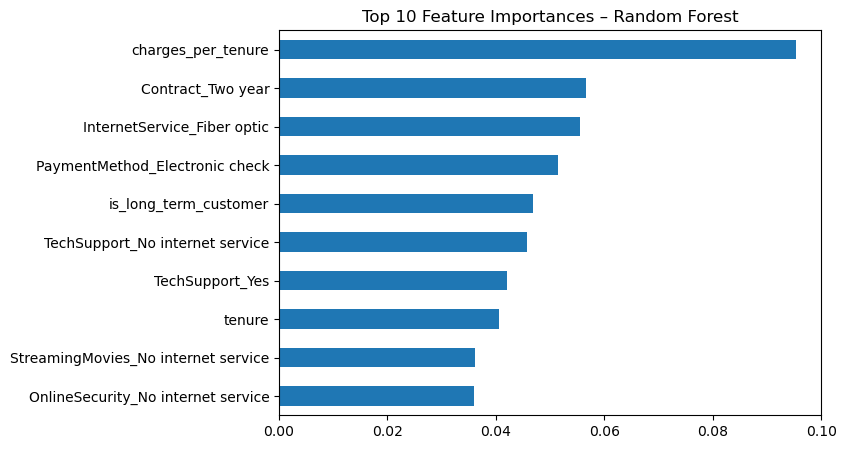

In [13]:
feature_importance.head(10).plot(kind="barh", figsize=(7, 5))
plt.title("Top 10 Feature Importances – Random Forest")
plt.gca().invert_yaxis()
plt.show()
